In [1]:
import numpy as np
from gcs import GCSforBlocks

from pydrake.geometry.optimization import Point, HPolyhedron
from pydrake.geometry.optimization import Iris
from draw_2d_solution import Draw2DSolution

In [2]:
block_dim = 2
num_blocks = 2
horizon = 7
max_rounded_paths = 100
display_graph = False

gcs = GCSforBlocks(block_dim, num_blocks, horizon)

width = 1
ub = width * 2 * (num_blocks + 1)
gcs.set_block_width(width)
gcs.set_ub(ub)

initial_state = []
for i in range(gcs.num_modes):
    block_state = [0] * gcs.block_dim
    block_state[0] = width * (2 * i + 1)
    initial_state += block_state
initial_point = Point(np.array(initial_state))
final_state = []
for i in range(gcs.num_modes):
    block_state = [0] * gcs.block_dim
    block_state[-1] = ub - width * (2 * i + 1)
    final_state += block_state
final_point = Point(np.array(final_state))


gcs.build_the_graph(initial_point, 0, final_point, 0)
gcs.solve(max_rounded_paths=max_rounded_paths)
gcs.verbose_solution_description()
if display_graph:
    gcs.display_graph()

sampled many points
Iris finished mode 1
mode  1 has convex sets: 4
sampled many points
Iris finished mode 2
mode  2 has convex sets: 4


Adding layers: 100%|██████████████████████████████| 6/6 [00:00<00:00,  8.85it/s]

Solving...
Solving GCS took 4.22 seconds
Optimal cost is 22.8
-----------------------
Solution is:
-----------------------
Start at [1. 0.]
Move to [3. 0.] ; 
Move to [5. 0.] ; Grasp   block 2
Move to [4. 1.] ; 
Move to [0. 1.] ; Ungrasp block 2
Move to [3. 0.] ; Grasp   block 1
Move to [1. 2.] ; 
Move to [0. 3.] ; Ungrasp block 1
Move to [0. 5.] ; Finish


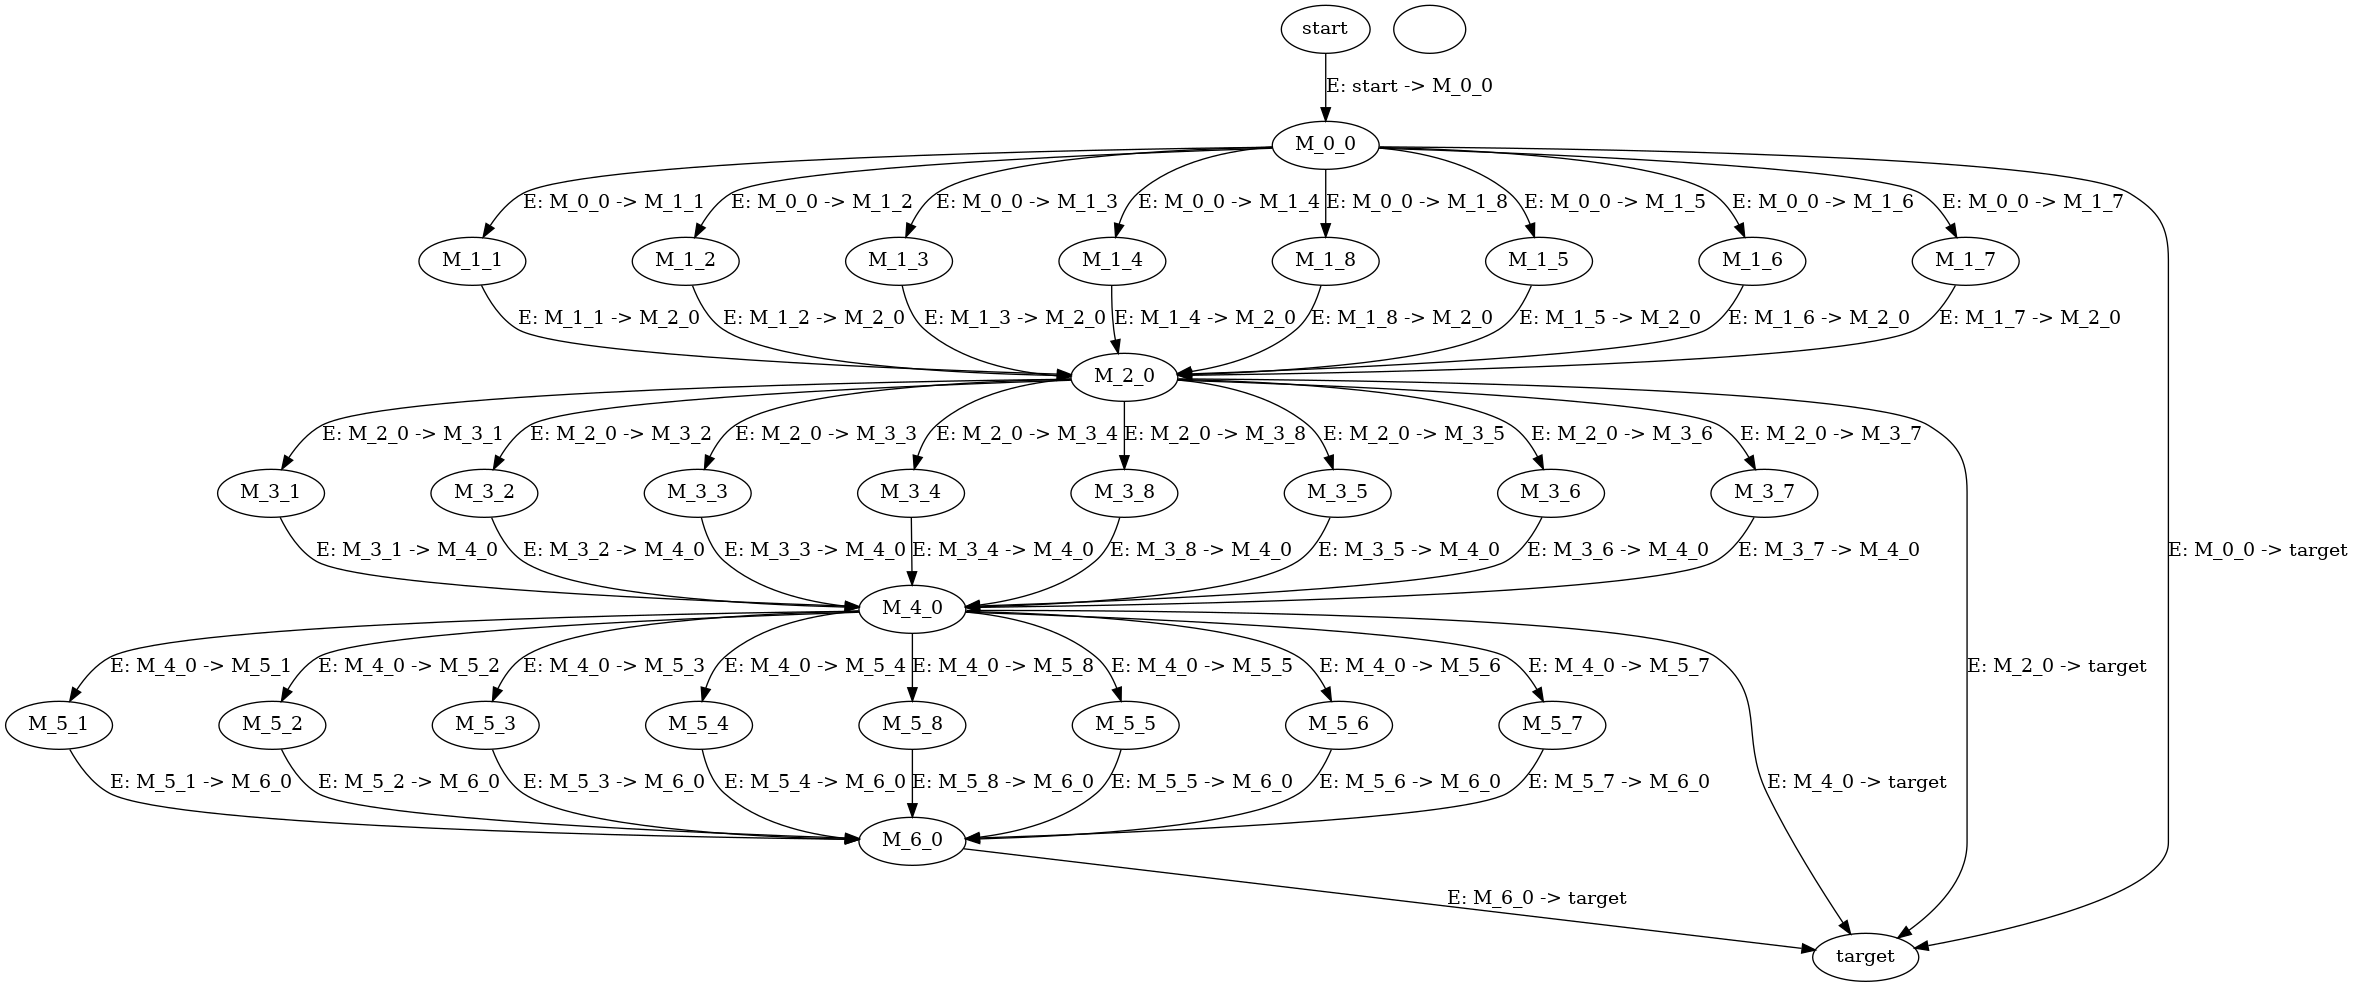

In [4]:
gcs.display_graph()
# gcs.num_gcs_sets
# gcs.sets_per_mode

In [6]:
[1,2,3]+[4,5]

[1, 2, 3, 4, 5]

In [20]:
block_dim = 1
state_dim = 3
sample = np.ones(state_dim) * 1.5


lb = np.zeros(state_dim)
ub = np.ones(state_dim) * 2

k = 1
A = np.vstack((-np.eye(state_dim), np.eye(state_dim)))
b = np.hstack((-lb, ub))



domain = HPolyhedron(A, b)

res = Iris([HPolyhedron.MakeUnitBox(3)], sample, domain)

In [24]:
np.vstack((np.array([]), np.eye(2) ))

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 0 and the array at index 1 has size 2

In [21]:

eq_con = np.zeros((block_dim, state_dim))
eq_con[:, 0 : block_dim] = np.eye(block_dim)
eq_con[:, k * block_dim : (k + 1) * block_dim] = -np.eye(block_dim)
A = np.vstack((eq_con, -eq_con))
b = np.hstack((np.zeros(block_dim), np.zeros(block_dim)))
plain = HPolyhedron(A, b)
new = res.Intersection(plain)

In [22]:
new.A()

array([[-1.        , -0.        , -0.        ],
       [-0.        , -1.        , -0.        ],
       [-0.        , -0.        , -1.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ],
       [-0.57741594, -0.57733839, -0.57729646],
       [ 1.        , -1.        ,  0.        ],
       [-1.        ,  1.        , -0.        ]])

In [17]:
new.b()

array([-0., -0., -0.,  2.,  2.,  2.,  0.,  0.])

Adding layers: 100%|█████████████████████████████| 9/9 [00:00<00:00, 203.69it/s]


Solving...
Solving GCS took 1.29 seconds
Optimal cost is 30.0
-----------------------
Solution is:
-----------------------
Start at [1.]
Move to [1.] ; 
Move to [7.] ; Grasp   block 3
Move to [1.] ; Ungrasp block 3
Move to [3.] ; Grasp   block 1
Move to [5.] ; Ungrasp block 1
Move to [5.] ; Grasp   block 2
Move to [3.] ; Ungrasp block 2
Move to [7.] ; Finish


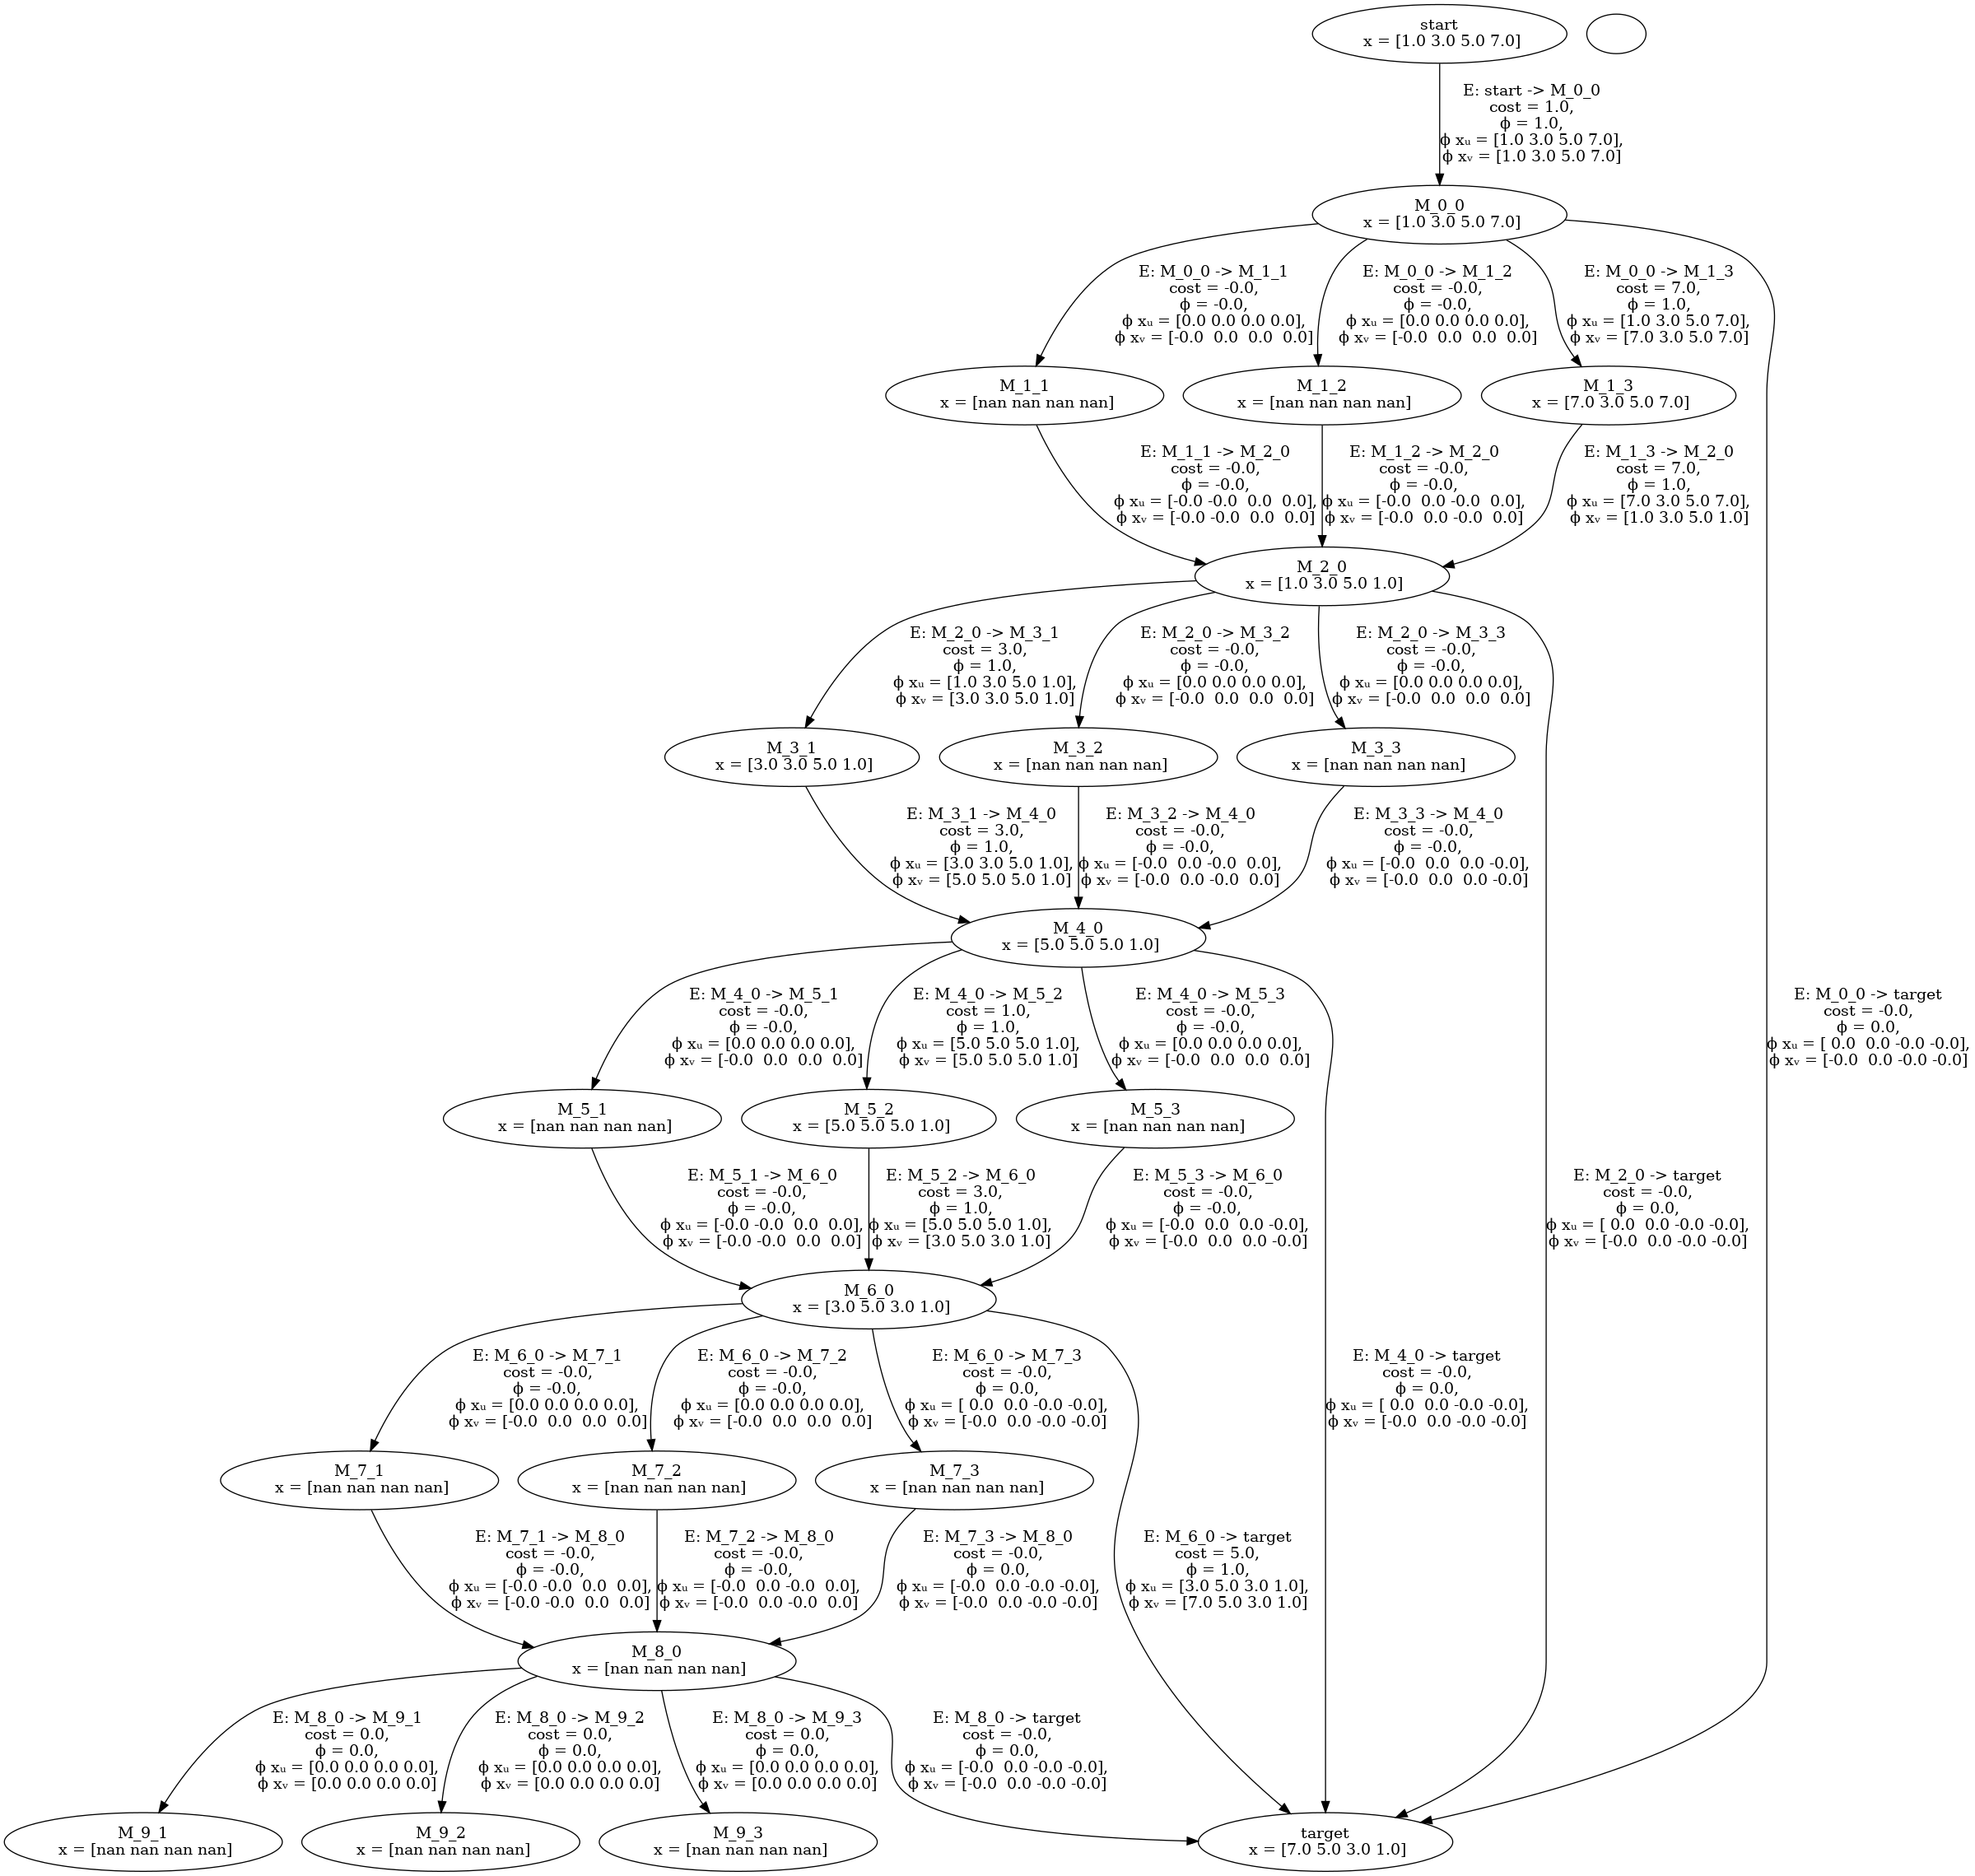

In [2]:
block_dim = 1
num_blocks = 3
horizon = 10
max_rounded_paths = 30
display_graph = True

gcs = GCSforBlocks(block_dim, num_blocks, horizon)

width = 1
ub = width * 2 * (num_blocks + 1)
gcs.set_block_width(width)
gcs.set_ub(ub)

initial_state = []
for i in range(gcs.num_modes):
    block_state = [0] * gcs.block_dim
    block_state[0] = width * (2 * i + 1)
    initial_state += block_state
initial_point = Point(np.array(initial_state))
final_state = []
for i in range(gcs.num_modes):
    block_state = [0] * gcs.block_dim
    block_state[-1] = ub - width * (2 * i + 1)
    final_state += block_state
final_point = Point(np.array(final_state))
gcs.build_the_graph(initial_point, 0, final_point, 0)
gcs.solve(max_rounded_paths=max_rounded_paths)
gcs.verbose_solution_description()
if display_graph:
    gcs.display_graph()

In [14]:
gcs.solution.get_solver_details().optimizer_time

0.0035957529908046126

In [5]:
np.linalg.norm(np.array([1, 2]))

2.23606797749979